# Fourierovy řady

In [2]:
# import knihoven
from scipy import integrate
import numpy as np, matplotlib.pyplot as plt, scipy as sci, math

### Buď T = 5 a buď f taková T-periodická funkce že:
$$
f(t) = \left\{
        \begin{array}{ll}
            e^{-2t}-1 & \quad t \in \langle 0,1) \\
            2, & \quad t \in \langle 1,5)
        \end{array}
    \right.
$$

Nejdříve je nutné ověřit kvadratickou integrovatelnost funkce, tedy ověřit, že:
$$
\int_0^T f^2(t) dt < \infty
$$
tedy že:
$$
\int_0^1 (e^{-2t}-1)^2 dt + \int_1^5 2^2 dt < \infty
$$


In [3]:
square = (float(integrate.quad(lambda t: (np.exp(-2*t)-1)**2, 0,1)[0]) + float(integrate.quad(lambda t: 2**2,1,5)[0]))

Což znamená že:
$$
16.38 < \infty
$$
což platí, funkce je tedy kvadraticky integrovatelná

## 1) Sestavte Fourierovu řadu funkce t
Vzorec pro Fourierovu řadu je
$$
f(t) = \frac{a_0}{2} + \displaystyle\sum_{n=1} ^{\infty}( a_n cos(n \omega t) + b_n sin(n \omega t))
$$
kde
$$
a_0 = \frac{2}{T} \int_0^T f(t) dt \\
a_n = \frac{2}{T} \int_0^T f(t)\cos(n \omega t) dt\\
b_n = \frac{2}{T} \int_0^T f(t)\sin(n \omega t) dt\\
$$

pak a_0 je:
$$
a_0 = \frac{2}{T} \int_0^T f(t) dt = \frac{2}{5} (\int_0^1 e^{-2t}-1 dt + \int_1^5 2 dt) = 2,97
$$


In [4]:
T = 5 # perioda
omega = 2 * sci.pi / T  #úhlová frekvence
N = 3   # počet členů přes které je proveden součet
t = np.arange(0,14,0.02)

# výpočet a_0
a_0 = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1), 0,1)[0]) + float(integrate.quad(lambda t: 2,1,5)[0]))
print(a_0)

2.972932943352678


and a_n and b_n are:

In [5]:
a = []
b = []

# výpočet koeficientů a_n a b_n  pro N členů
for n in range(1,N):
    a_n  = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1)*np.cos(n*omega*t), 0,1)[0]) + float(integrate.quad(lambda t: 2 *np.cos(n*omega*t),1,5)[0]))   # výpočet a_n
    a.append(a_n)
    b_n = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1)*np.sin(n*omega*t), 0,1)[0]) + float(integrate.quad(lambda t: 2 *np.sin(n*omega*t),1,5)[0]))    # výpočet b_n
    b.append(b_n)

def recursive_fourier(t, n=N-1):    # rekurzivní součet Fourierovy řady
    if int(n)==1:
        return a[n-1]*np.cos(omega*t*n)+b[n-1]*np.sin(omega*t*n)
    else:
        return (recursive_fourier(t, n-1) + a[n-1]*np.cos(omega*t*n)+b[n-1]*np.sin(omega*t*n))
    

## 2) Sestavte sinovou Fourierovu řadu funkce T v intervalu (0,T)
Pokud je funkce lichá zjednodušuje se součet Fourierovy sinové řady na:
$$
f(t) = \displaystyle\sum_{n=1} ^{\infty}b_n sin(\frac{n \pi t}{l})
$$
kde
$$
b_n = \frac{2}{l} \int_0^l f(t)\sin(n \frac{\pi}{l} t) dt\\
$$
kde L je T původní funkce

In [6]:
L=T
b_sine = []

# výpočet koeficientu b_n pro N členů
for n in range(1,N):
    b_n = 2/L * (float(integrate.quad(lambda t: ((np.exp(-2*t)-1)*np.sin(n*np.pi/L*t)), 0,1)[0]) + float(integrate.quad(lambda t: (2*np.sin(n*np.pi/L*t)),1,5)[0]))
    b_sine.append(b_n)
    
def recursive_sine_fourier(t, n=N-1):   # rekurzivní součet Fourierovy sinové řady
    if int(n)==1:
        return b_sine[n-1]*np.sin(t*np.pi/L*n)
    else:
        return (recursive_sine_fourier(t, n-1) + b_sine[n-1]*np.sin(t*np.pi/L*n))

## 3)a Nakreslete graf součtu příslušné Fourierovy 

Text(0, 0.5, 'y')

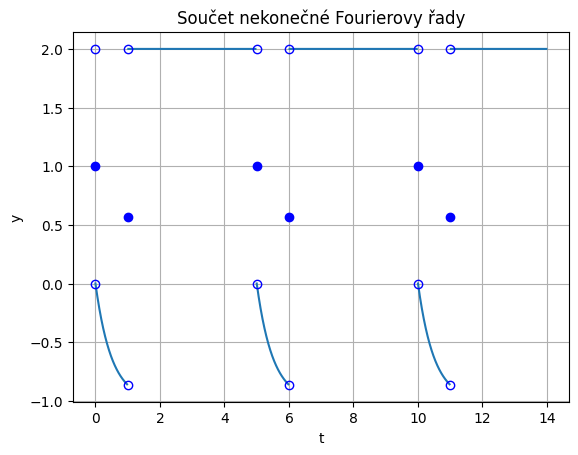

In [7]:
# funkce pro výpočet po částech definované funkce
def make_piecewise(t):
    y = np.array([2 if x%5>1 else (np.exp(-2*(x%5))-1) for x in t])
    y[:-1][np.absolute(np.diff(y)) >= 0.8] = np.nan
    return y

# výpočet průměrů ve skocích
modulo_t = [x%5 if np.isclose(x%5,0) or np.isclose(x%5,1) else np.nan for x in t]
averages_t = t[~np.isnan(modulo_t)]
average_y_points = [np.mean([2,np.exp(-2*(x%5))-1]) for x in averages_t]
lower_y_points = [np.exp(-2*(x%5))-1 for x in averages_t]
upper_y_points = [2 for x in averages_t]

# vynášení všech křivek a bodů do grafu
plt.plot(t,make_piecewise(t))
plt.plot(averages_t, average_y_points,'bo')
plt.plot(averages_t, lower_y_points,'bo', fillstyle='none')
plt.plot(averages_t, upper_y_points,'bo', fillstyle='none')
plt.title("Součet nekonečné Fourierovy řady")
plt.grid()
plt.xlabel("t")
plt.ylabel("y")


Text(0, 0.5, 'y')

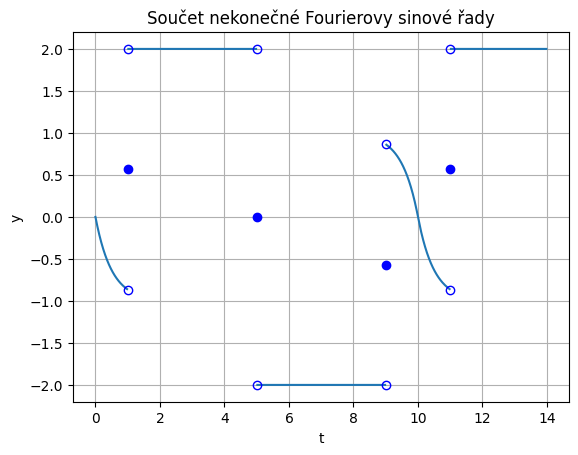

In [8]:
# funkce pro výpočet po částech definované funkce - lichá verze
def make_piecewise_odd(t):
    values=[]
    for x in t:
        if x%10<1:
            values.append(np.exp(-2*(x%10))-1)
        elif x%10>1 and x%10<5:
            values.append(2)
        elif x%10>5 and x%10<9:
            values.append(-2)
        elif x%10>9:
            values.append(-(np.exp(-2*((-x)%5))-1))
        else:
            values.append(np.nan)
    return values

# pomocná funkce pro výpočet průměrů ve skocích - lichá verze
def make_averages(t):
    values = []
    for x in t:
        if np.isclose(x%10,1):
            values.append(np.mean([2,np.exp(-2*(x%5))-1]))
        elif np.isclose(x%10,5):
            values.append(0)
        else:
            values.append(np.mean([-(np.exp(-2*((-x)%5))-1),-2]))
    return values

# samotný výpočet průměrů ve skocích
modulo_t = [x%5 if np.isclose(x%10,1) or np.isclose(x%10,5) or np.isclose(x%10,9) else np.nan for x in t]
averages_t = t[~np.isnan(modulo_t)]
average_y_points = make_averages(averages_t)
lower_y_points = [np.exp(-2*(x%5))-1 if np.isclose(x%10,1) else -2 for x in averages_t]
upper_y_points = [2 if not(np.isclose(x%10,9)) else -(np.exp(-2*((-x)%5))-1) for x in averages_t]

# vynášení křivek a bodů do grafu
plt.plot(t,make_piecewise_odd(t))
plt.plot(averages_t, average_y_points,'bo')
plt.plot(averages_t, lower_y_points,'bo', fillstyle='none')
plt.plot(averages_t, upper_y_points,'bo', fillstyle='none')
plt.title("Součet nekonečné Fourierovy sinové řady")
plt.grid()
plt.xlabel("t")
plt.ylabel("y")

## b) Nakreslete graf součtu prvních 3 členů příslušné Fourierovy řady 

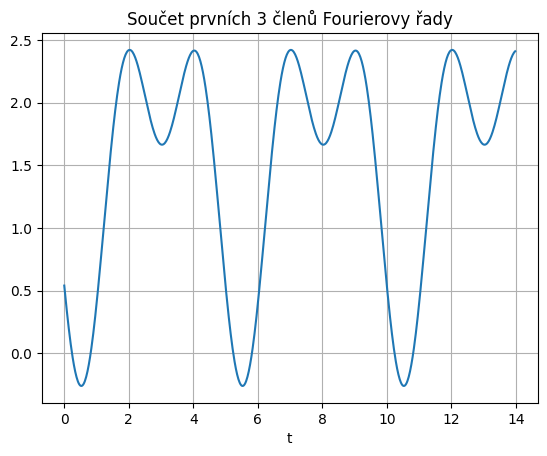

In [9]:
# vynesení funkce
plt.title("Součet prvních 3 členů Fourierovy řady")
plt.grid()
plt.xlabel("t")
fourier = np.add(list(map(recursive_fourier, t)),a_0/2) # hodnoty Fourierovy funkce
plt.plot(t,fourier)

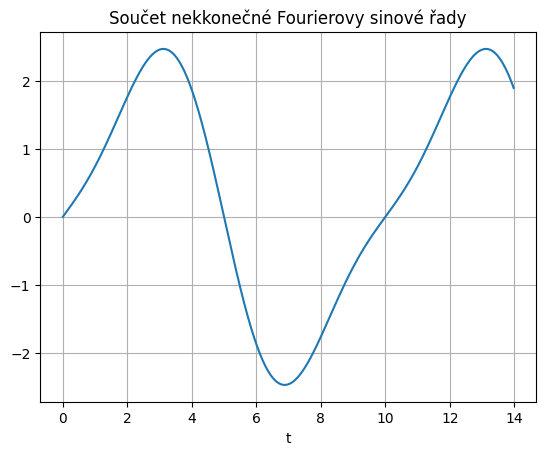

In [10]:
# vynesení křivky do grafu
plt.title("Součet nekkonečné Fourierovy sinové řady")
plt.grid()
plt.xlabel("t")
fourier_sine = list(map(recursive_sine_fourier, t))  # hodnoty Fourierovy sinové řady
plt.plot(t,fourier_sine)

## c) Nakreslete prvních 5 členů amplitudového a fázového spektra

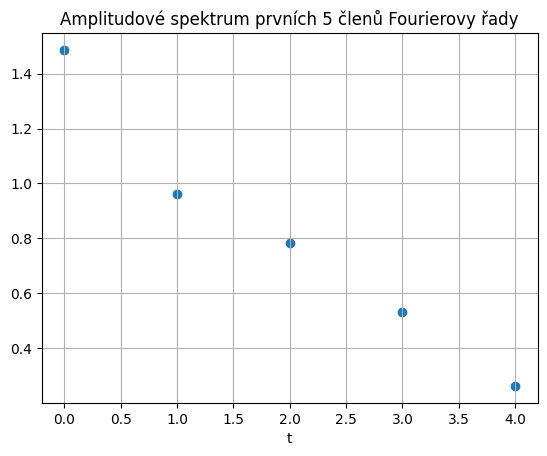

In [11]:
# výpočet prvních pěti členů amplitudového a fázového spektra Fourierovy řady
amplitudes = []
phases = []
amplitudes.append(np.abs(a_0/2))
phases.append(np.nan)

for n in range(1,7):
    a_n  = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1)*np.cos(n*omega*t), 0,1)[0]) + float(integrate.quad(lambda t: 2 *np.cos(n*omega*t),1,5)[0]))   # výpočet a_n
    b_n = 2/T * (float(integrate.quad(lambda t: (np.exp(-2*t)-1)*np.sin(n*omega*t), 0,1)[0]) + float(integrate.quad(lambda t: 2 *np.sin(n*omega*t),1,5)[0]))    # výpočet b_n
    amplitude = np.sqrt(b_n**2+ a_n**2)
    amplitudes.append(amplitude)
    phase = np.arccos(a_n/amplitude) if b_n<0 else -np.arccos(a_n/amplitude)
    phases.append(phase)

# vynášení křivek 
plt.title("Amplitudové spektrum prvních 5 členů Fourierovy řady")
plt.scatter(np.arange(5),amplitudes[:5])
plt.xlabel("t")
plt.grid()

(-0.2, 5.2)

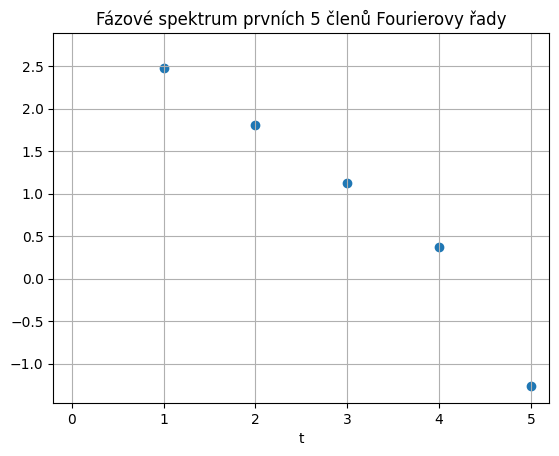

In [12]:
# vynášení křivek
plt.title("Fázové spektrum prvních 5 členů Fourierovy řady")
plt.grid()
plt.xlabel("t")
plt.scatter(np.arange(7),phases[:7])
plt.xlim(-0.2,5.2)

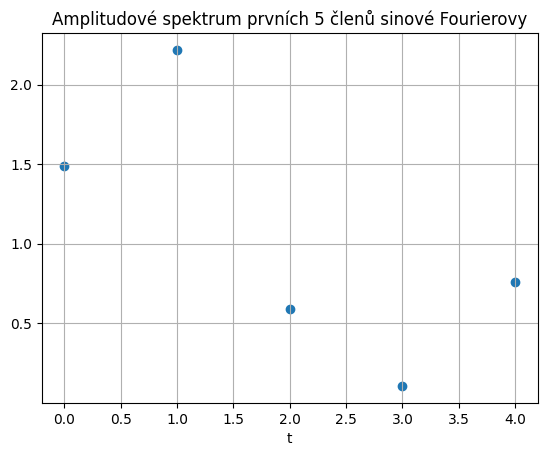

In [13]:
# výpočet prvních pěti členů amplitudového a fázového spektra Fourierovy sinové řady
sine_amplitudes = []
sine_phases = []
sine_amplitudes.append(np.abs(a_0/2))
sine_phases.append(np.nan)

for n in range(1,7):
    b_n = 2/L * (float(integrate.quad(lambda t: ((np.exp(-2*t)-1)*np.sin(n*np.pi/L*t)), 0,1)[0]) + float(integrate.quad(lambda t: (2*np.sin(n*np.pi/L*t)),1,5)[0]))
    amplitude = np.sqrt(b_n**2)
    sine_amplitudes.append(amplitude)
    phase = np.arccos(0/amplitude) if b_n<0 else -np.arccos(0/amplitude)
    sine_phases.append(phase)

# vynášení křivek 
plt.title("Amplitudové spektrum prvních 5 členů sinové Fourierovy")
plt.scatter(np.arange(5),sine_amplitudes[:5])
plt.xlabel("t")
plt.grid()

(-0.2, 5.2)

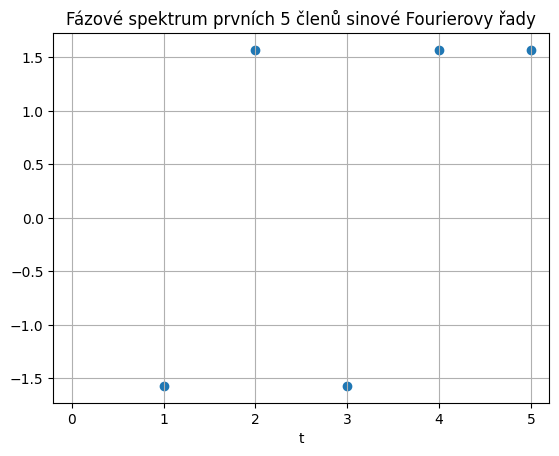

In [14]:
# vynášení křivek
plt.title("Fázové spektrum prvních 5 členů sinové Fourierovy řady")
plt.grid()
plt.xlabel("t")
plt.scatter(np.arange(7),sine_phases[:7])
plt.xlim(-0.2,5.2)